## Webscraping and API

In [21]:
from nba_api.stats.endpoints import leaguedashplayerstats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
## THIS SHOWS SEASON AVERAGES
## BUT CALCULATES IT MANUALLY SINCE I COULDN'T FIND THE DATA SET THAT SHOWS SEASON AVERAGES

def get_players_averages():
    player_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24', season_type_all_star='Regular Season')
    df = player_stats.get_data_frames()[0]

    df_avg = df.copy()
    # MANUALLY CALCULATED AVERAGES
    df_avg['PTS'] = (df['PTS'] / df['GP']).round(1)
    df_avg['REB'] = (df['REB'] / df['GP']).round(1)
    df_avg['AST'] = (df['AST'] / df['GP']).round(1)
    df_avg['STL'] = (df['STL'] / df['GP']).round(1)
    df_avg['BLK'] = (df['BLK'] / df['GP']).round(1)
    df_avg['TOV'] = (df['TOV'] / df['GP']).round(1)
    df_avg['FGM'] = (df['FGM'] / df['GP']).round(1)
    df_avg['FGA'] = (df['FGA'] / df['GP']).round(1)
    df_avg['FG3M'] = (df['FG3M'] / df['GP']).round(1)
    df_avg['FG3A'] = (df['FG3A'] / df['GP']).round(1)
    df_avg['FTM'] = (df['FTM'] / df['GP']).round(1)
    df_avg['FTA'] = (df['FTA'] / df['GP']).round(1)
    df_avg['MIN'] = (df['MIN'] / df['GP']).round(1)
    ## additional stats
    df_avg['DD2'] = (df['DD2'])
    df_avg['TD3'] = (df['TD3'])
    df_avg['PLUS_MINUS'] = (df['PLUS_MINUS'] / df['GP']).round(1)

    per_game_averages = df_avg[['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 
                            'GP', 'MIN', 'PTS', 'REB', 
                            'AST', 'STL', 'BLK', 
                            'TOV', 'FGM', 'FGA', 
                            'FG3M', 'FG3A', 'FTM', 
                            'FTA', 'FG_PCT', 'FG3_PCT', 'FT_PCT',
                            'DD2', 'TD3', 'PLUS_MINUS']].copy()

    return per_game_averages

player_avg_df = get_players_averages()

In [9]:
player_avg_df.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ABBREVIATION,GP,MIN,PTS,REB,AST,STL,BLK,...,FG3M,FG3A,FTM,FTA,FG_PCT,FG3_PCT,FT_PCT,DD2,TD3,PLUS_MINUS
0,1630639,A.J. Lawson,DAL,42,7.4,3.2,1.2,0.5,0.2,0.1,...,0.3,1.2,0.4,0.5,0.446,0.260,0.652,0,0,0.4
1,1631260,AJ Green,MIL,56,11.0,4.5,1.1,0.5,0.2,0.1,...,1.2,3.0,0.3,0.3,0.423,0.408,0.895,0,0,0.9
2,1631100,AJ Griffin,ATL,20,8.5,2.4,0.9,0.2,0.0,0.1,...,0.5,2.0,0.1,0.1,0.290,0.256,1.000,0,0,-2.6
3,203932,Aaron Gordon,DEN,73,31.5,13.9,6.5,3.5,0.8,0.6,...,0.5,1.9,2.4,3.7,0.556,0.290,0.658,12,0,5.8
4,1628988,Aaron Holiday,HOU,78,16.3,6.6,1.6,1.8,0.5,0.1,...,1.1,2.8,0.7,0.8,0.446,0.387,0.921,0,0,1.1


In [37]:
player_avg_df.describe()

,PLAYER_ID,GP,MIN,PTS,REB,AST,STL,BLK,TOV,FGM,...,FG3M,FG3A,FTM,FTA,FG_PCT,FG3_PCT,FT_PCT,DD2,TD3,PLUS_MINUS
count,5.720000e+02,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,...,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1.378544e+06,46.155594,18.647028,8.421853,3.371853,1.998427,0.589685,0.400524,0.981294,3.118182,...,0.940210,2.645105,1.242308,1.599650,0.449591,0.299481,0.701395,3.928322,0.239510,-0.433392
std,5.463796e+05,25.536868,9.911186,6.791446,2.426350,1.874359,0.390314,0.413921,0.797643,2.459483,...,0.879913,2.242284,1.385588,1.682807,0.113367,0.149458,0.235103,9.403586,1.848077,3.244338
min,2.544000e+03,1.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,1.627848e+06,22.000000,10.800000,3.400000,1.600000,0.700000,0.300000,0.100000,0.400000,1.300000,...,0.200000,0.900000,0.300000,0.500000,0.407750,0.255500,0.667000,0.000000,0.000000,-2.400000
50%,1.629724e+06,51.000000,17.350000,6.400000,3.000000,1.300000,0.550000,0.300000,0.700000,2.400000,...,0.700000,2.100000,0.800000,1.000000,0.452000,0.339000,0.760500,0.000000,0.000000,-0.400000
75%,1.630702e+06,69.000000,27.000000,11.700000,4.400000,2.725000,0.825000,0.600000,1.400000,4.500000,...,1.500000,3.800000,1.625000,2.100000,0.500000,0.384000,0.833000,3.000000,0.000000,1.500000
max,1.642013e+06,84.000000,37.800000,34.700000,13.700000,10.900000,2.000000,3.600000,4.400000,11.500000,...,4.800000,11.800000,10.200000,11.600000,0.747000,1.000000,1.000000,77.000000,26.000000,8.600000


In [13]:
print(player_avg_df.columns)

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'PTS',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM',
       'FTA', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'DD2', 'TD3', 'PLUS_MINUS'],
      dtype='object')


In [62]:
## create csv
player_avg_df.to_csv('player_avg_df.csv', index=False)

## Correlation and summary statistics

In [19]:
print("Summary Statistics for player plus/minus")
print(player_avg_df["PLUS_MINUS"].describe().round(2))

Summary Statistics for player plus/minus
count    572.00
mean      -0.43
std        3.24
min      -13.00
25%       -2.40
50%       -0.40
75%        1.50
max        8.60
Name: PLUS_MINUS, dtype: float64


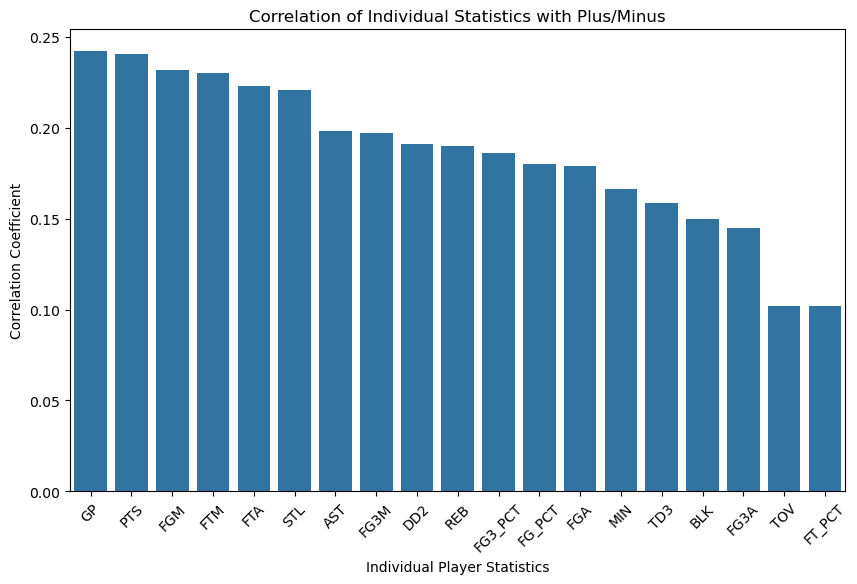

In [35]:
## create corr df excluding the first 3 columns (since they aren't stats)
correlations = player_avg_df.iloc[:, 3:].corr()["PLUS_MINUS"].drop("PLUS_MINUS").sort_values(ascending=False)

## plot, in descending order, the individual statistics correlation to Plus/Minus
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45)
plt.title("Correlation of Individual Statistics with Plus/Minus")
plt.xlabel("Individual Player Statistics")
plt.ylabel("Correlation Coefficient")
plt.show()

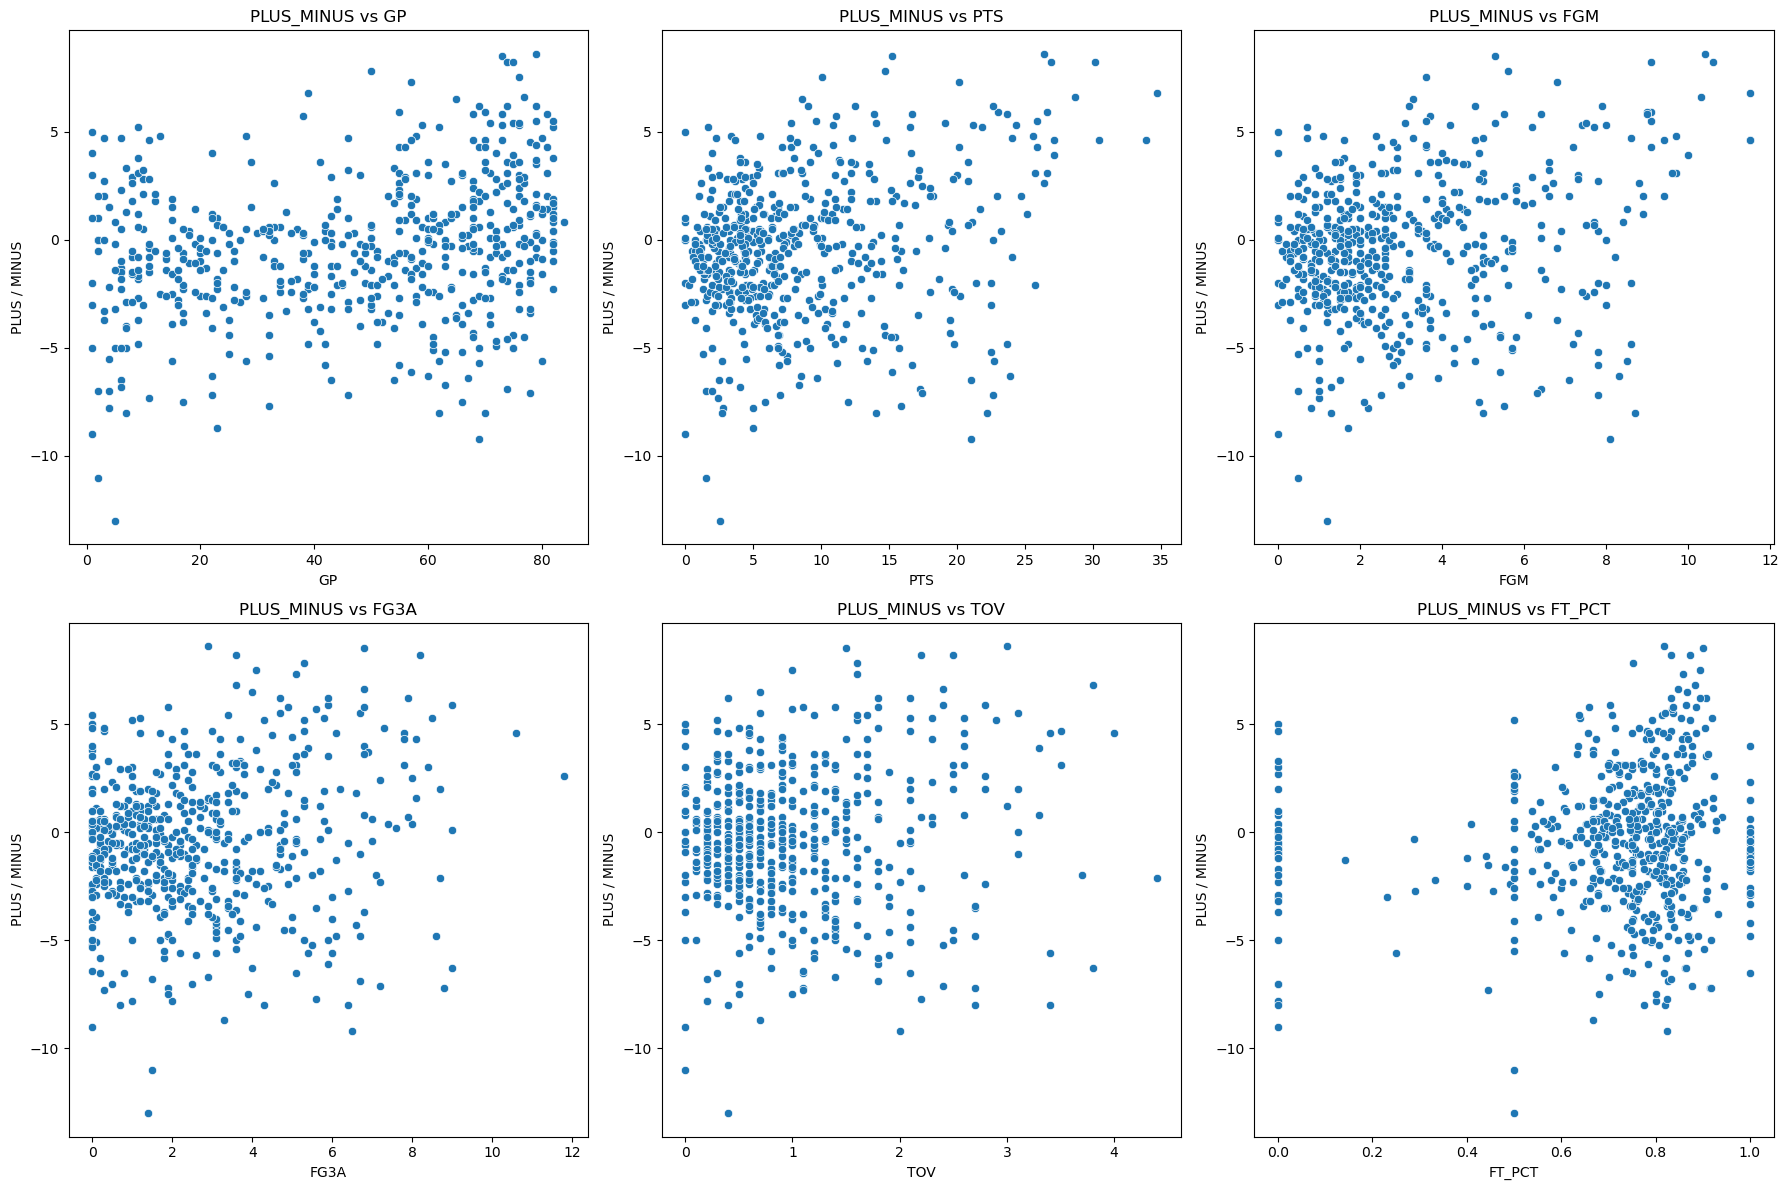

In [31]:
## select the 3 lowest and 3 highest correlated columns
lowest_3 = correlations.head(3)
highest_3 = correlations.tail(3)
selected_columns = list(lowest_3.index) + list(highest_3.index)

## plot those 6 correlation plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=player_avg_df[col], y=player_avg_df["PLUS_MINUS"])
    plt.title(f'PLUS_MINUS vs {col}')
    plt.xlabel(col)
    plt.ylabel('PLUS / MINUS')

plt.tight_layout()
plt.show()